In [1]:
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from imcp import mcp_curve, mcp_score, plot_mcp_curve, imcp_curve, imcp_score, plot_imcp_curve, plot_curve
from sklearn.svm import SVC

# MCP curve

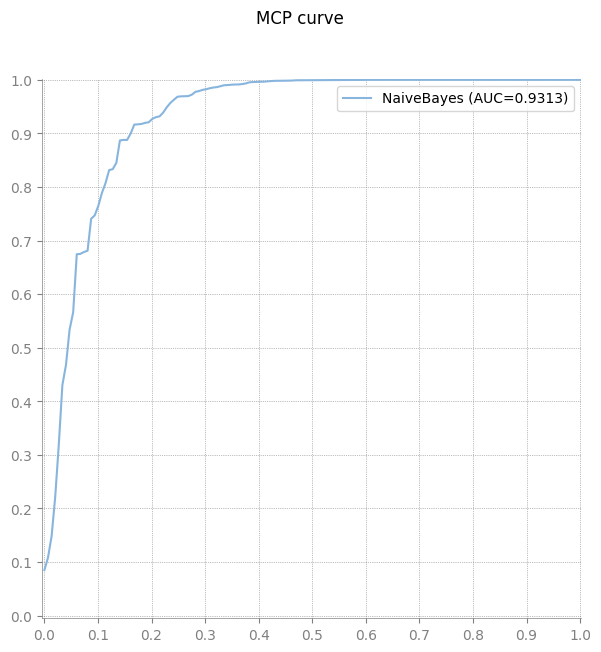

In [3]:
X, y = load_iris(return_X_y=True)
algorithm = {'NaiveBayes': GaussianNB()}

algorithm['NaiveBayes'].fit(X, y)
score = {'NaiveBayes': algorithm['NaiveBayes'].predict_proba(X)}

plot_mcp_curve(y, score) # Fig. 3

In [6]:
area = mcp_score(y, score)
print("Area under the MCP curve is equal to {}".format(area))

Area under the MCP curve is equal to 0.9312789283247503


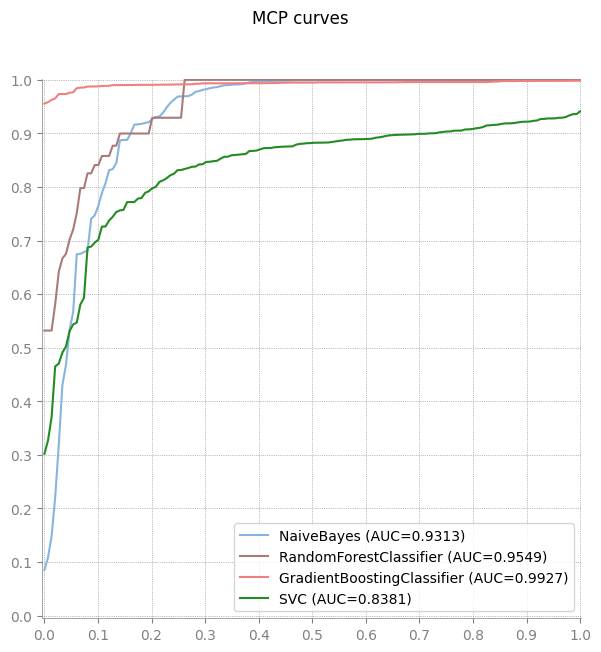

In [7]:
X, y = load_iris(return_X_y=True)
algorithms = {'NaiveBayes': GaussianNB(),
             'RandomForestClassifier': RandomForestClassifier(random_state=42),
             'GradientBoostingClassifier': GradientBoostingClassifier(),
             'SVC': SVC(probability=True),}

scores = {}
for key in algorithms:
    algorithms[key].fit(X, y)
    score = algorithms[key].predict_proba(X)
    scores[key] = score

plot_mcp_curve(y, scores) # Fig. 4

# IMCP curve

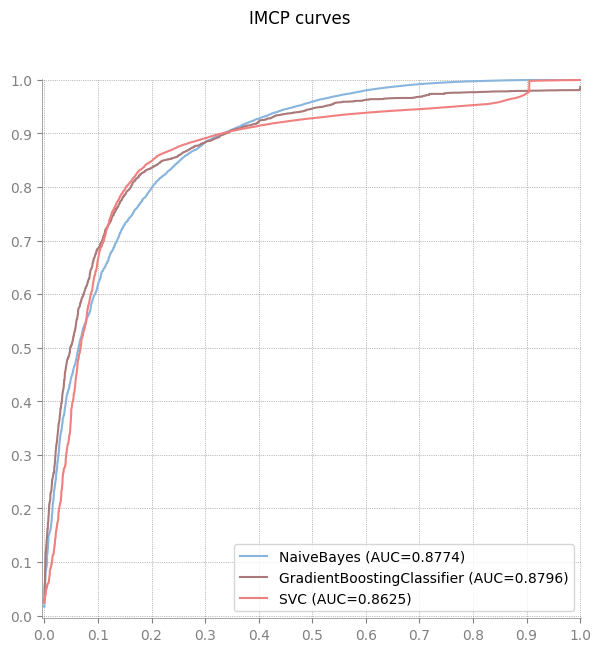

In [8]:
data = pd.read_csv("exp2_1000.csv", sep = "\t")

y = data["class"].to_numpy()
X = data[["X" , "Y"]].to_numpy()

algorithms = {'NaiveBayes': GaussianNB(),
             'GradientBoostingClassifier': GradientBoostingClassifier(),
             'SVC': SVC(probability=True),}
scores = {}
for key in algorithms:
    algorithms[key].fit(X, y)
    score = algorithms[key].predict_proba(X)
    scores[key] = score

plot_imcp_curve(y, scores) # Fig. 6